**Edge Detection with OpenCV**

Here we will cover the following topics related to edge detection with OpenCV

1. Laplacian edge detection
2. Sobel edge detection
3. Canny edge detection
4. Contour identification
5. Bounding box creation

Edge detection is needed to detect objects in a picture. An edge is mathematically defined as a distinct change in pixel value. 

Note the edge can be identified by derivatives
![Pre derivative](images/prederivative.png)

The first derivative or slope will have the highest value at the point of the edge. Sobel Filters use this concept to identify edges.
![First derivative](images/first_derivative.png)

The second derivative will be 0 at the edge. Laplacian uses the second derivative to identify the edge.
![Second Derivative](images/second_derivative.png)



In [13]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

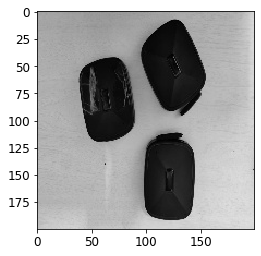

In [14]:
image = cv2.imread("images/devices_small.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(fixColor(image))

### Laplacian

The Laplacian involves calculating the double derivative of pixel values. In an ideal scenario the edge the first derivative is highest and the second derivative is 0. This is the fundamental idea behind Laplacian edge detection.

The laplacian use a 64 bit float representation as opposed to an 8-bit representation used for images before. This is because edges definations can be +ve (black-white) and -ve (white-black). 8-bit representation is no longer sufficient.

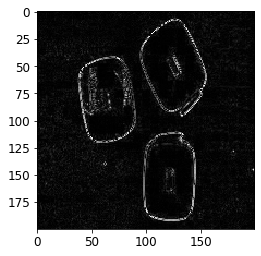

In [15]:
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(fixColor(lap))

### Sobel 

Sobel filters involve a matrix convolution that gives the approximate derivative and therefore gradient. These filters are applied both horizontally and vertically.

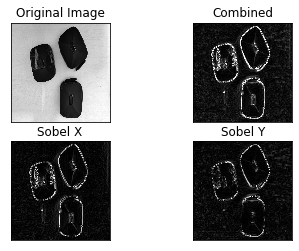

In [4]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
titles = ['Original Image', 'Combined',
            'Sobel X', 'Sobel Y']
images = [image, sobelCombined, sobelX, sobelY]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

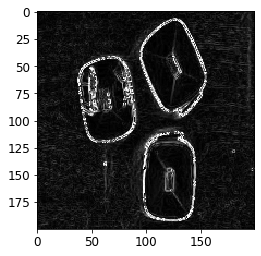

In [5]:
plt.imshow(fixColor(sobelCombined))

### Canny Edge Detector

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel 
gradient images in the x and y direction, suppressing edges, and finally a hysteresis thresholding stage that 
determines if a pixel is “edge-like” or not.

1. Gaussian blur to remove noise
2. Compute the Sobel gradients along the x (G<sub>x</sub>) and y (G<sub>y</sub>) directions. The final gradient and angle are calculated by the formulae below
![Gradient Calculation](images/canny_sobel_formula.png)
3. After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.
4. This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

![Gradient Calculation](images/canny_hysteresis.png)
The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines.

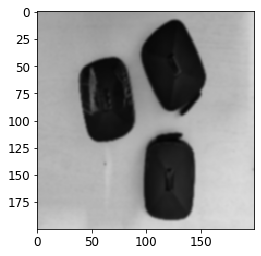

In [6]:
image = cv2.imread("images/devices_small.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(fixColor(blurred))

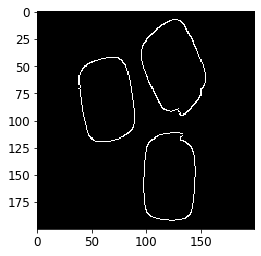

In [7]:
canny = cv2.Canny(blurred, 30, 300)
plt.imshow(fixColor(canny))

In [8]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
coins = image.copy()

In [10]:
cv2.drawContours(coins, cnts, -1, (255, 0, 0), 2)

array([[[152, 159, 162],
        [153, 160, 163],
        [154, 161, 164],
        ...,
        [200, 205, 208],
        [201, 208, 211],
        [205, 212, 215]],

       [[154, 161, 164],
        [156, 163, 166],
        [156, 163, 166],
        ...,
        [205, 210, 213],
        [204, 211, 214],
        [206, 213, 216]],

       [[154, 161, 164],
        [156, 163, 166],
        [157, 164, 167],
        ...,
        [205, 210, 213],
        [209, 214, 217],
        [212, 217, 220]],

       ...,

       [[185, 192, 195],
        [187, 194, 197],
        [185, 192, 195],
        ...,
        [213, 216, 220],
        [214, 219, 222],
        [212, 217, 220]],

       [[177, 184, 187],
        [182, 189, 192],
        [186, 193, 196],
        ...,
        [211, 216, 219],
        [213, 218, 221],
        [213, 218, 221]],

       [[180, 187, 190],
        [185, 192, 195],
        [187, 194, 197],
        ...,
        [209, 214, 217],
        [210, 215, 218],
        [212, 217, 220]]

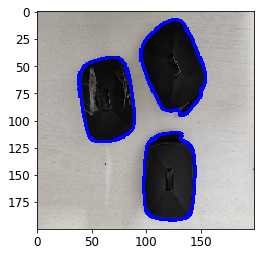

In [11]:
plt.imshow(fixColor(coins))

You can also add a bounding box around each contour by using the bounding rect function.

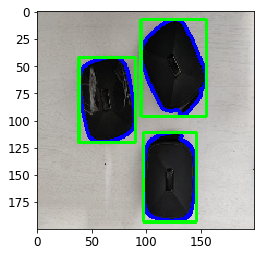

In [12]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(coins,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(fixColor(coins))

**References**
1. https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
2. https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
3. https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html